# EDA

Exploratory data analysis on the merged datasets.

## Importing modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Blues_d')

%matplotlib inline

In [2]:
df = pd.read_csv('../data/train_weather_spray_merged.csv')

### Species

In [3]:
df.species.value_counts()

CULEX PIPIENS/RESTUANS    4723
CULEX RESTUANS            2713
CULEX PIPIENS             2691
CULEX OTHER                313
Name: species, dtype: int64

In [4]:
species_list = ['C. pipiens/restuans', 'C. restuans', 'C. pipiens', 'Other']
species_pct = [df[(df.species == 'CULEX PIPIENS/RESTUANS')]['wnvpresent'].mean(),  
            df[(df.species == 'CULEX RESTUANS')]['wnvpresent'].mean(),
            df[(df.species == 'CULEX PIPIENS')]['wnvpresent'].mean(),
            df[(df.species == 'CULEX OTHER')]['wnvpresent'].mean()]

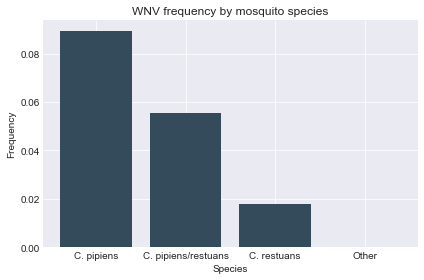

In [5]:
plt.bar(x=species_list, height=species_pct)
plt.title('WNV frequency by mosquito species')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.tight_layout()

C. pipiens species was more likely to have WNV compared to other species.

### Latitude

In [6]:
latitude_list = []
for i in set(df.latitude.values):
    latitude_list.append(df[df.latitude == i]['wnvpresent'].mean())

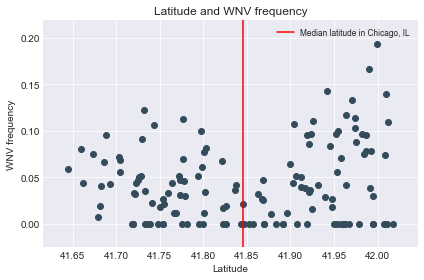

In [7]:
plt.scatter(list(set(df.latitude.values)), latitude_list)
plt.axvline(df.latitude.median(),  color='red', label='Median latitude in Chicago, IL')
plt.xlabel('Latitude')
plt.ylabel('WNV frequency')
plt.title('Latitude and WNV frequency')
plt.legend(fontsize='small')
plt.tight_layout()

**More cases were on the northern side of the city; the bimodal appearance of the distribution is an artifact of the 41.85 latitude being the urban center of the city.**

### Longitude

In [8]:
longitude_list = []
for i in set(df.longitude.values):
    longitude_list.append(df[df.longitude == i]['wnvpresent'].mean())

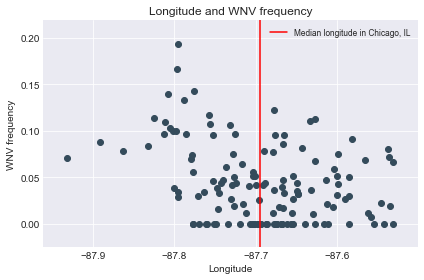

In [9]:
plt.scatter(list(set(df.longitude.values)), longitude_list)
plt.axvline(df.longitude.median(),  color='red', label='Median longitude in Chicago, IL')
plt.xlabel('Longitude')
plt.ylabel('WNV frequency')
plt.title('Longitude and WNV frequency')
plt.legend(fontsize='small')
plt.tight_layout()

More cases were on the eastern side of the city.

### Address Accuracy

In [10]:
df.addressaccuracy.value_counts()

8    4591
9    3953
5    1806
3      90
Name: addressaccuracy, dtype: int64

In [11]:
aa_list = [3, 5, 8, 9]
aa_pct = [df[df.addressaccuracy == 3]['wnvpresent'].mean(),  
            df[df.addressaccuracy == 5]['wnvpresent'].mean(),
            df[df.addressaccuracy == 8]['wnvpresent'].mean(),
            df[df.addressaccuracy == 9]['wnvpresent'].mean()]

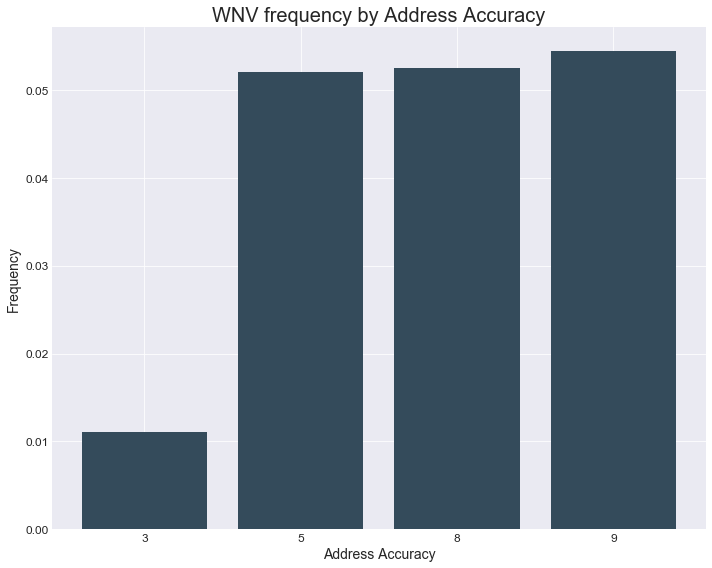

In [61]:
plt.figure(figsize=(10, 8))
plt.bar(x=[str(i) for i in aa_list], height=aa_pct)
plt.title('WNV frequency by Address Accuracy', size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Address Accuracy', size=14)
plt.ylabel('Frequency', size=14)
plt.tight_layout()

It looks like fewer of the low-accuracy sites reported West Nile Virus present. Could be a data collection issue?

### Station

In [16]:
df[df.station == 1]['wnvpresent'].mean()

0.06542056074766354

In [17]:
df[df.station == 2]['wnvpresent'].mean()

0.043614736494300345

'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'codesum', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed'

## Weather variables

In [18]:
import math

In [30]:
def plotting(df, columns, num_cols=2):
    fig = plt.figure(figsize=(6*num_cols,4*round(len(columns)/num_cols)))
    for col_number, col_name in enumerate(columns):   
        fig.add_subplot(math.ceil(len(columns)/num_cols), num_cols, col_number + 1)
        sns.distplot(df[col_name],bins=10)
        plt.ylabel('Count')
    fig.tight_layout()

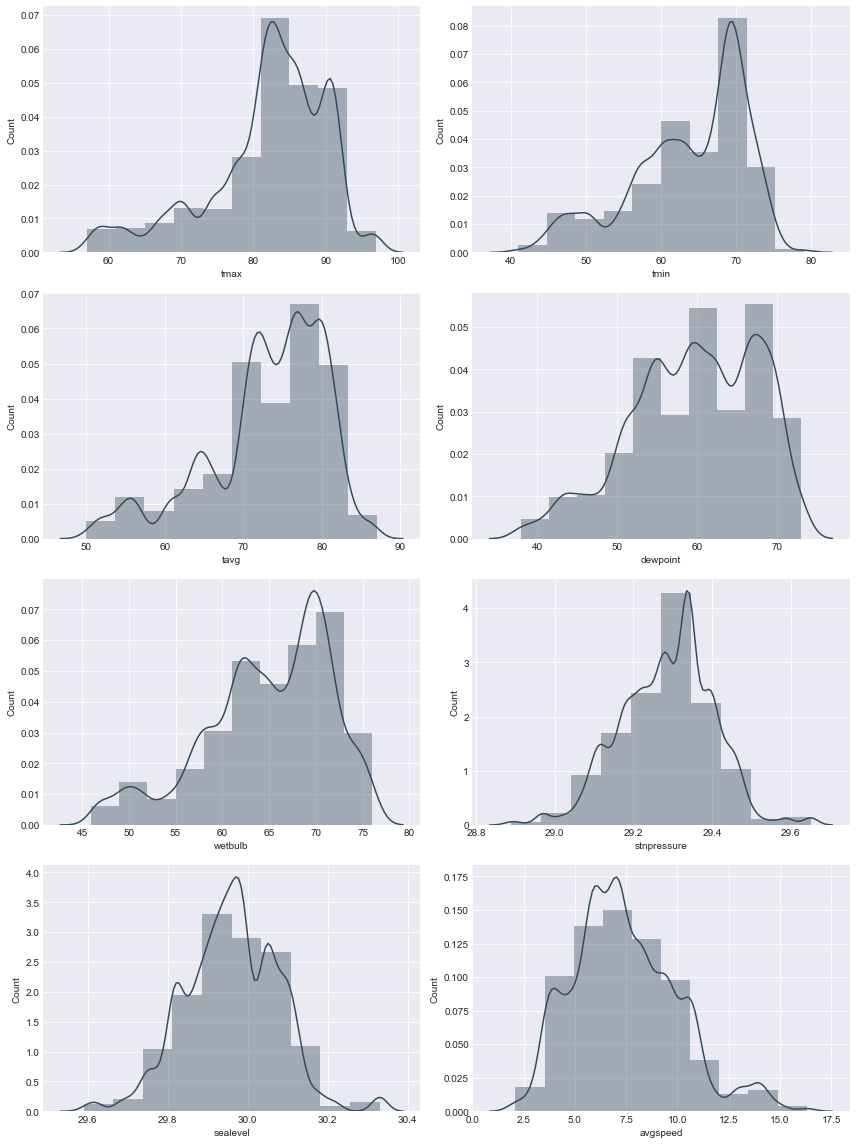

In [31]:
plotting(df, ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'stnpressure', 'sealevel', 'avgspeed'])

### Temperature

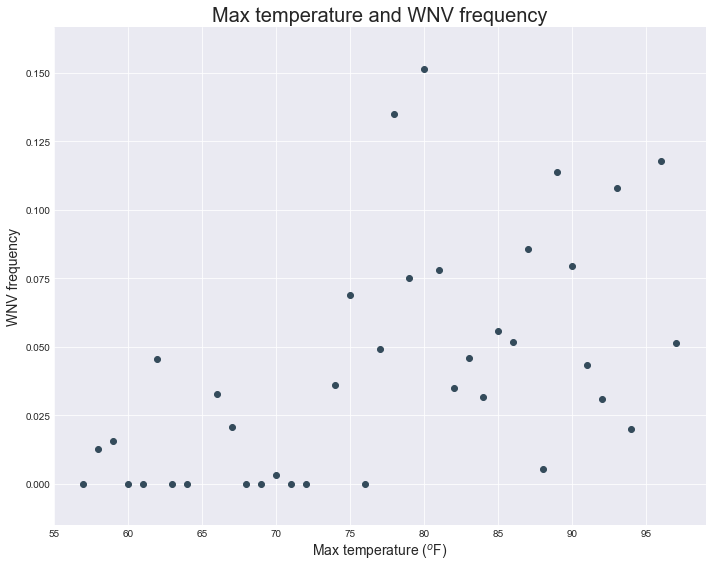

In [58]:
tmax_list = []
for i in list(set(df.tmax.values)):
    tmax_list.append(df[df.tmax == i]['wnvpresent'].mean())

plt.figure(figsize=(10, 8))
plt.scatter(list(set(df.tmax.values)), tmax_list)
plt.xlabel('Max temperature ($^o$F)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Max temperature and WNV frequency', size=20)
plt.tight_layout()

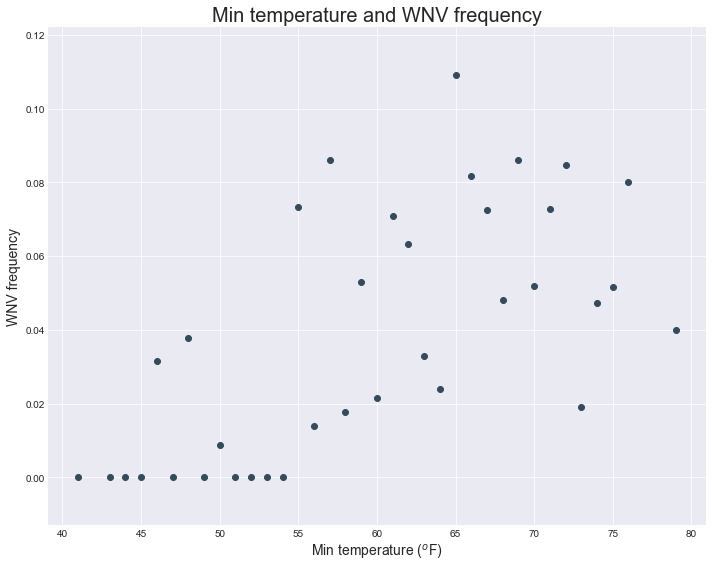

In [57]:
tmin_list = []
for i in list(set(df.tmin.values)):
    tmin_list.append(df[df.tmin == i]['wnvpresent'].mean())

plt.figure(figsize=(10, 8))
plt.scatter(list(set(df.tmin.values)), tmin_list)
plt.xlabel('Min temperature ($^o$F)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Min temperature and WNV frequency', size=20)
plt.tight_layout()

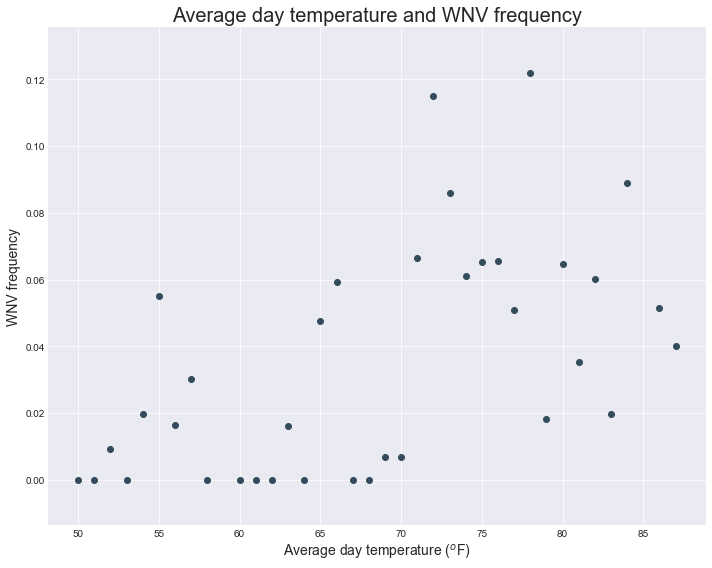

In [54]:
tavg_list = []
for i in list(set(df.tavg.values)):
    tavg_list.append(df[df.tavg == i]['wnvpresent'].mean())

plt.figure(figsize=(10, 8))
plt.scatter(list(set(df.tavg.values)), tavg_list)
plt.xlabel('Average day temperature ($^o$F)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Average day temperature and WNV frequency', size=20)
plt.tight_layout()

### Dewpoint

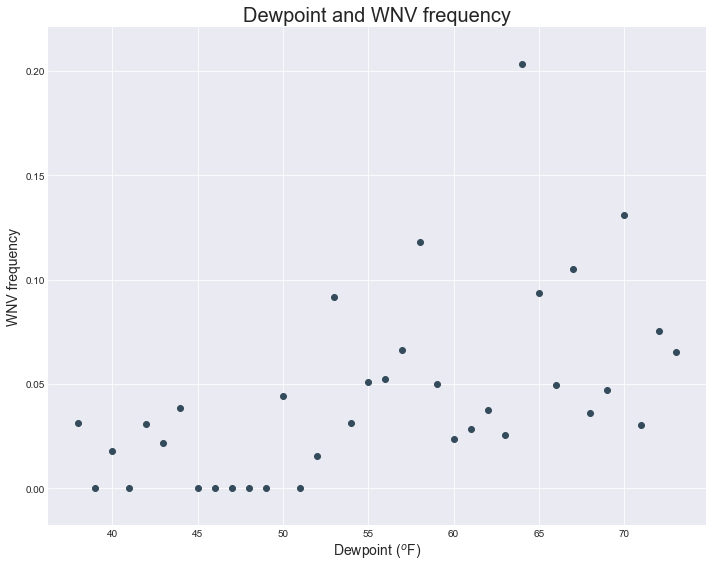

In [80]:
dewpt_list = []
for i in list(set(df.dewpoint.values)):
    dewpt_list.append(df[df.dewpoint == i]['wnvpresent'].mean())

plt.figure(figsize=(10, 8))
plt.scatter(list(set(df.dewpoint.values)), dewpt_list)
plt.xlabel('Dewpoint ($^o$F)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Dewpoint and WNV frequency', size=20)
plt.tight_layout()

In [69]:
df.preciptotal = df.preciptotal.map(lambda x: x.replace('T', '0.01')).astype(float)

In [77]:
df[df.wnvpresent == 1]['preciptotal'].mean()

0.1697277676951006

In [78]:
df[df.wnvpresent == 0]['preciptotal'].mean()

0.1498240469208189